<a href="https://colab.research.google.com/github/rjanovicci/dio_face_recognition/blob/master/dio_face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Deleted 0 images.
Found 90 files belonging to 3 classes.
Using 72 files for training.
Using 18 files for validation.
Classes: ['w', 'j', 'o']


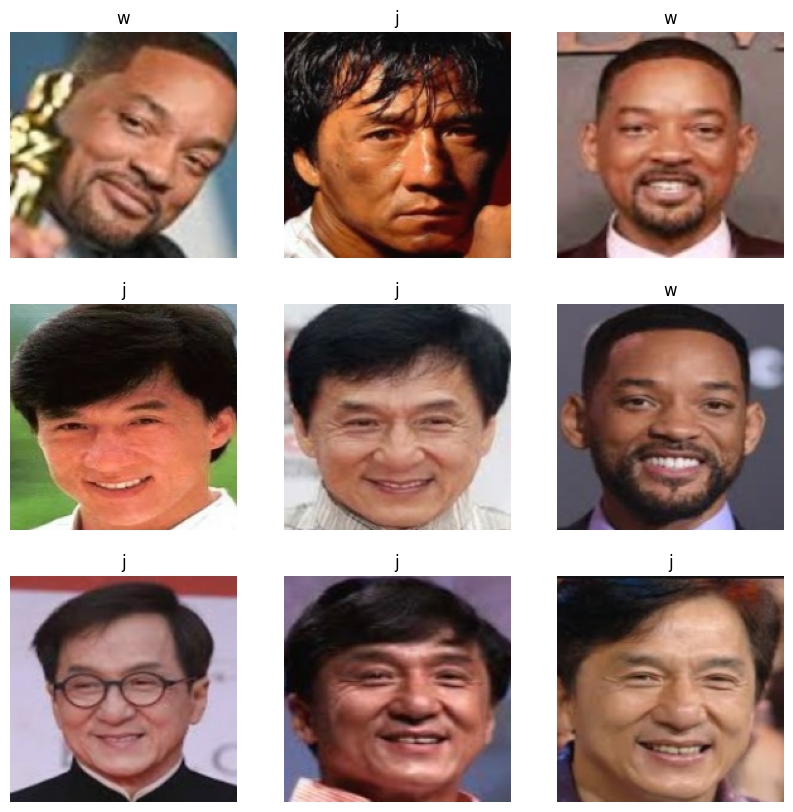

<ipython-input-18-a263a7409820>:73: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = keras.applications.MobileNetV2(


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ true_divide_2 (TrueDivide)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ subtract_2 (Subtract)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 6, 6, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │           3,843 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,261,827 (8.63 MB)

 Trainable params: 3,843 (15.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 767ms/step - accuracy: 0.3307 - loss: 1.5831 - val_accuracy: 0.2778 - val_loss: 1.6293
Epoch 2/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.3247 - loss: 1.5587 - val_accuracy: 0.3333 - val_loss: 1.5552
Epoch 3/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.2765 - loss: 1.5861 - val_accuracy: 0.3333 - val_loss: 1.5042
Epoch 4/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.3299 - loss: 1.5045 - val_accuracy: 0.3333 - val_loss: 1.4629
Epoch 5/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.4171 - loss: 1.3808 - val_accuracy: 0.3333 - val_loss: 1.4262
Epoch 6/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.3199 - loss: 1.3992 - val_accuracy: 0.2778 - val_loss: 1.3866
Epoch 7/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.3533 - loss: 1.3426 - val_accuracy: 0.3333 - val_loss: 1.3491
Epoch 8/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.3898 - loss: 1.2677 - val_accuracy: 0.2778 - val_loss: 1.31

In [18]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Monta o Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Remove imagens corrompidas
num_skipped = 0
for folder_name in ("w", "j", "o"):
    folder_path = os.path.join("/content/drive/MyDrive/images", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            with open(fpath, "rb") as fobj:
                is_jfif = b"JFIF" in fobj.peek(10)
        except Exception:
            is_jfif = False
        if not is_jfif:
            num_skipped += 1
            os.remove(fpath)
print(f"Deleted {num_skipped} images.")

# Parâmetros
image_size = (180, 180)
batch_size = 32

# Cria os datasets definindo explicitamente a ordem das classes:
# Índice 0 -> "w" (Will Smith), 1 -> "j" (Jackie Chan), 2 -> "o" (Outros)
initial_train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/images",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    class_names=["w", "j", "o"]  # Aqui definimos explicitamente a ordem desejada
)

# Salva os nomes das classes
class_names = initial_train_ds.class_names
print("Classes:", class_names)  # Esperado: ['w', 'j', 'o']

# Visualiza algumas imagens do dataset
plt.figure(figsize=(10, 10))
for images, labels in initial_train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

# Define data augmentation
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1)
])

# Pré-carrega os datasets para otimização
AUTOTUNE = tf.data.AUTOTUNE
train_ds = initial_train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

num_classes = 3

# --- TRANSFER LEARNING COM MobileNetV2 ---
# Carrega o modelo base pré-treinado no ImageNet
base_model = keras.applications.MobileNetV2(
    input_shape=image_size + (3,),
    include_top=False,
    weights="imagenet"
)
base_model.trainable = False  # Congela o modelo base inicialmente

# Constrói o modelo completo
inputs = keras.Input(shape=image_size + (3,))
x = data_augmentation(inputs)
x = keras.applications.mobilenet_v2.preprocess_input(x)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
# Camada final com ativação softmax para obter probabilidades
outputs = layers.Dense(num_classes, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.summary()

# Compila o modelo
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Treina o modelo (apenas o head, inicialmente)
epochs = 90
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# --- FINE-TUNING ---
# Descongela parte do modelo base para fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

# Recompila com uma taxa de aprendizado menor
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

fine_tune_epochs = 10
total_epochs = epochs + fine_tune_epochs
history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=total_epochs,
    initial_epoch=epochs
)



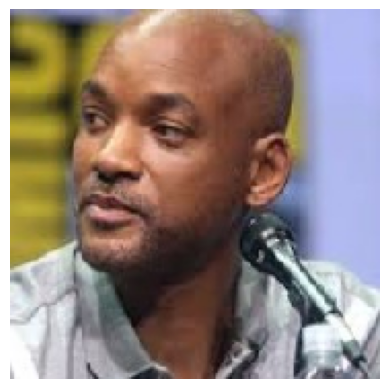

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predição: Will Smith (confiança: 0.75)


In [30]:
# --- PREDIÇÃO ---
# Carrega e exibe uma imagem de teste (exemplo: imagem da pasta "j" para Jackie Chan)
img_path = "/content/drive/MyDrive/val/val_w.jpg"
img = keras.utils.load_img(img_path, target_size=image_size)
plt.imshow(img)
plt.axis("off")
plt.show()

# Prepara a imagem para predição
img_array = keras.utils.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Adiciona dimensão do batch

# Faz a predição
predictions = model.predict(img_array)
confidence = np.max(predictions[0])
predicted_class = np.argmax(predictions[0])

# Mapeia os rótulos das pastas para os nomes desejados
mapping = {
    "w": "Will Smith",
    "j": "Jackie Chan",
    "o": "Outros"
}
predicted_label = class_names[predicted_class]
predicted_name = mapping[predicted_label]

if confidence >= 0.3:
    print(f"Predição: {predicted_name} (confiança: {confidence:.2f})")
else:
    print(f"Confiança baixa ({confidence:.2f}). Predição incerta.")
